In [1]:
# This work moved to "NEW_plot_dendro_PDFs.ipynb" for "convenience"

# Attempt to fit all the regions with MLE

# updated in July 2022 from the original "MLE_fitting_all.ipynb" 
#which was supposedly used to do all the MLE fits previously

# Previously used plfit package from Adam Ginsubrg: https://github.com/keflavich/plfit
# had some problems with that code (a bit out of date with new python changes)

# Now updated to use powerlaw from jeffalstott: https://github.com/jeffalstott/powerlaw

# This was run on ALL dendrogram structures in add_powerlaws_to_table.py and appended to Table 4
# we decided just having a small dedicated table would be better for clear / clean interpretation
# now performed in this script.

In [4]:
#Jeffalstott simple powerlaw example: 

import powerlaw
data = np.array([1.7, 3.2, 4.5, 6.2]) # data can be list or numpy array
results = powerlaw.Fit(data)
print(results.power_law.alpha)
print(results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')

Calculating best minimal value for power law fit
3.9930409725725697
3.2


In [5]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from math import *
import powerlaw
import aplpy

In [6]:
#path='/Users/battersby/Google Drive/higal_cmz/nh2_pdfs/all_fits_files/'
path='/Users/battersby/Dropbox/Work/higal_cmz/nh2_pdfs/all_fits_files/'


In [7]:
# R > 100 pc
# read in and identify data
hdulist=fits.open(path+'r_gt_100pc.fits')
hdu=hdulist[0]                              # Set hdu to data
dat=hdulist[0].data
data=dat.flatten()
#convert zeros to nans
data[np.where(data==0)]=np.nan
rgt100=data
rgt100 = data[np.isfinite(data)]

In [8]:
# R < 100 pc
# read in and identify data
hdulist=fits.open(path+'r_lt_100pc.fits')
hdu=hdulist[0]                              # Set hdu to data
dat=hdulist[0].data
data=dat.flatten()
#convert zeros to nans
data[np.where(data==0)]=np.nan
rlt100=data
rlt100 = data[np.isfinite(data)]

In [9]:
# SgrB2
# read in and identify data
hdulist=fits.open(path+'sgrb2.fits')
hdu=hdulist[0]                              # Set hdu to data
dat=hdulist[0].data
data=dat.flatten()
#convert zeros to nans
data[np.where(data==0)]=np.nan
sgrb2=data
sgrb2=data[np.isfinite(data)]

In [11]:
# Perform MLE fits for Three Major regions
#myplfit_outer100pc=plfit.plfit(rgt100)
#myplfit_inner100pc=plfit.plfit(rlt100)
#myplfit_sgrb2=plfit.plfit(sgrb2)

outer100pc_results = powerlaw.Fit(rgt100)
print(outer100pc_results)

inner100pc_results = powerlaw.Fit(rlt100)
sgrb2_results = powerlaw.Fit(sgrb2)
#results = powerlaw.Fit(data)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


In [16]:
print('Outer 100pc results:', outer100pc_results.power_law.alpha, outer100pc_results.power_law.xmin, outer100pc_results.power_law.sigma)
print('Inner 100pc results:', inner100pc_results.power_law.alpha, inner100pc_results.power_law.xmin, inner100pc_results.power_law.sigma)
print('SgrB2 results:', sgrb2_results.power_law.alpha, sgrb2_results.power_law.xmin, sgrb2_results.power_law.sigma)

Outer 100pc results: 7.264335858163923 1.009680014858701e+23 0.2464669978469236
Inner 100pc results: 3.290314266065519 7.183707528217374e+22 0.057097495138705545
SgrB2 results: 2.5317471146157873 1.7135776846659466e+23 0.05688765969006041


In [9]:
#Print results
print('Outer 100pc')
print('xmin',myplfit_outer100pc._xmin)
print('alpha',myplfit_outer100pc._alpha)
print('alpha error',myplfit_outer100pc._alphaerr)

print('Sgr B2')
print('xmin',myplfit_sgrb2._xmin)
print('alpha',myplfit_sgrb2._alpha)
print('alpha error',myplfit_sgrb2._alphaerr)

print('Inner 100pc')
print('xmin',myplfit_inner100pc._xmin)
print('alpha',myplfit_inner100pc._alpha)
print('alpha error',myplfit_inner100pc._alphaerr)

Outer 100pc
('xmin', 1.0325063e+23)
('alpha', 7.0371490267046131)
('alpha error', 0.16187073232430454)
Sgr B2
('xmin', 7.1895077e+22)
('alpha', 2.9237245636210538)
('alpha error', 0.01917788605462167)
Inner 100pc
('xmin', 5.0002895e+22)
('alpha', 3.0608030367136356)
('alpha error', 0.025090731165378643)


<IPython.core.display.Javascript object>


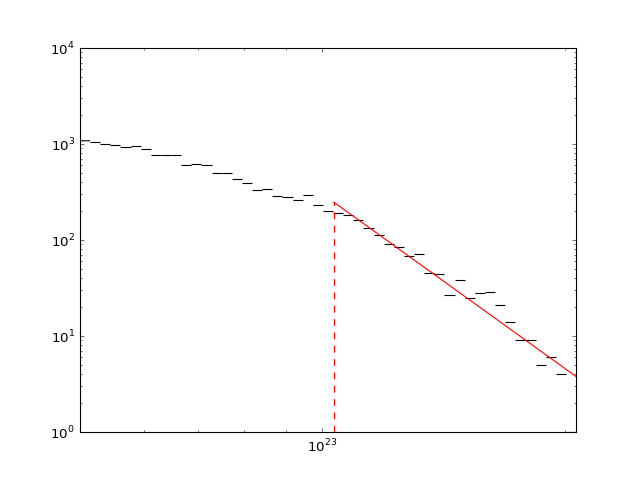

('xmin', 1.0325063e+23)
('alpha', 7.0371490267046131)
('alpha error', 0.16187073232430454)


In [10]:
# Look at results:
%matplotlib nbagg
#f1 = aplpy.FITSFigure(columnlist, 0, figure=fig, subplot=(3,1,1))
#NOT SURE HOW to plot both :(
myplfit.plotpdf()
#myplfit.plotcdf()



In [10]:
### Do same for smaller regions

In [20]:
# Short routine to open file, do MLE fits, and print results

def get_mle_fit_params(prefix):
    hdulist=fits.open(path+prefix+'.fits')
    hdu=hdulist[0]                              # Set hdu to data
    dat=hdulist[0].data
    data=dat.flatten()
    #convert zeros to nans
    data[np.where(data==0)]=np.nan
    data=data[np.isfinite(data)]
    
    # Perform MLE fits
    myplfit=plfit.plfit(data)
    
    return myplfit._xmin, myplfit._alpha, myplfit._alphaerr
    

In [23]:
# Outer 100 pc
path='/Users/battersby/Google Drive/higal_cmz/nh2_pdfs/all_fits_files/rgt100pc_diff_regions/'

#l=1.6deg
xmin,alpha,alphaerr = get_mle_fit_params('l1.6deg')
print('l1.6',xmin,alpha,alphaerr)

#l=1.2deg
xmin,alpha,alphaerr = get_mle_fit_params('l1.2deg')
print('l1.2',xmin,alpha,alphaerr)

#l=1.1deg
xmin,alpha,alphaerr = get_mle_fit_params('l1.1deg')
print('l1.1',xmin,alpha,alphaerr)

#l=0.9deg
xmin,alpha,alphaerr = get_mle_fit_params('l0.9deg')
print('l0.9',xmin,alpha,alphaerr)

('l1.6', 6.3734946e+22, 4.5947387595530653, 0.070771350216088019)
PYTHON plfit executed in 0.200687 seconds
Not enough data left after flagging low S/N points.  Using all data.
xmin: 6.25687e+22 n(>xmin): 1134 alpha: 11.5232 +/- 0.312493   Log-Likelihood: -58097.1   ks: 0.035039 p(ks): 0.123491
('l1.2', 6.2568717e+22, 11.523168285708419, 0.31249278054354113)
('l1.1', 8.6515824e+22, 6.2333002060954597, 0.15778993817189294)
PYTHON plfit executed in 0.180259 seconds
xmin: 7.01714e+22 n(>xmin): 1580 alpha: 4.64661 +/- 0.0917403   Log-Likelihood: -83085.3   ks: 0.152836 p(ks): 1.75478e-32
('l0.9', 7.0171423e+22, 4.6466065217305559, 0.091740343279375233)


In [24]:
# Sgr B2
path='/Users/battersby/Google Drive/higal_cmz/nh2_pdfs/all_fits_files/sgrb2_diff_regions/'

# Region 1
xmin,alpha,alphaerr = get_mle_fit_params('sgrb2_reg1')
print('reg1',xmin,alpha,alphaerr)

# Region 2
xmin,alpha,alphaerr = get_mle_fit_params('sgrb2_reg2')
print('reg2',xmin,alpha,alphaerr)

# Region 3
xmin,alpha,alphaerr = get_mle_fit_params('sgrb2_reg3')
print('reg3',xmin,alpha,alphaerr)

# Region 4
xmin,alpha,alphaerr = get_mle_fit_params('sgrb2_reg4')
print('reg4',xmin,alpha,alphaerr)

# Region 5
xmin,alpha,alphaerr = get_mle_fit_params('sgrb2_reg5')
print('reg5',xmin,alpha,alphaerr)


PYTHON plfit executed in 0.033550 seconds
xmin: 1.03817e+23 n(>xmin): 513 alpha: 3.17227 +/- 0.0959082   Log-Likelihood: -27538.6   ks: 0.109041 p(ks): 1.00695e-05
('reg1', 1.038165e+23, 3.1722737486218131, 0.095908228948418953)
PYTHON plfit executed in 0.009638 seconds
Not enough data left after flagging low S/N points.  Using all data.
xmin: 1.06021e+23 n(>xmin): 142 alpha: 8.81544 +/- 0.655857   Log-Likelihood: -7396.75   ks: 0.0743642 p(ks): 0.412132
('reg2', 1.0602109e+23, 8.8154440293058833, 0.65585749362046597)
PYTHON plfit executed in 0.078750 seconds
xmin: 3.28153e+23 n(>xmin): 582 alpha: 2.55938 +/- 0.0646384   Log-Likelihood: -32210.6   ks: 0.0845638 p(ks): 0.000485337
('reg3', 3.2815313e+23, 2.5593811724049287, 0.06463842920950176)
PYTHON plfit executed in 0.069922 seconds
Not enough data left after flagging low S/N points.  Using all data.
xmin: 1.35743e+23 n(>xmin): 453 alpha: 8.21465 +/- 0.338974   Log-Likelihood: -23749.7   ks: 0.0326662 p(ks): 0.71911
('reg4', 1.357425

In [25]:
# Inner 100 pc
path='/Users/battersby/Google Drive/higal_cmz/nh2_pdfs/all_fits_files/rlt100pc_diff_regions/'

# clouds c & d
xmin,alpha,alphaerr = get_mle_fit_params('clouds_c_d')
print('clouds c_d',xmin,alpha,alphaerr)

# cloud b
xmin,alpha,alphaerr = get_mle_fit_params('cloud_b')
print('cloud b',xmin,alpha,alphaerr)

# 20 & 50 km/s clouds
xmin,alpha,alphaerr = get_mle_fit_params('20_50_clouds')
print('20 & 50 km/s clouds',xmin,alpha,alphaerr)

# Brick+
xmin,alpha,alphaerr = get_mle_fit_params('brick_plus')
print('Brick +',xmin,alpha,alphaerr)

# tlp
xmin,alpha,alphaerr = get_mle_fit_params('three_little_pigs')
print('tlp',xmin,alpha,alphaerr)

# Sgr C
xmin,alpha,alphaerr = get_mle_fit_params('sgrc')
print('sgrc',xmin,alpha,alphaerr)


PYTHON plfit executed in 0.031257 seconds
xmin: 5.0056e+22 n(>xmin): 509 alpha: 2.89729 +/- 0.0840957   Log-Likelihood: -27055.4   ks: 0.111024 p(ks): 7.10326e-06
('clouds c_d', 5.0055992e+22, 2.8972861918720554, 0.084095731933359133)
PYTHON plfit executed in 0.004204 seconds
Not enough data left after flagging low S/N points.  Using all data.
xmin: 5.01947e+22 n(>xmin): 85 alpha: 4.16219 +/- 0.342988   Log-Likelihood: -4456.99   ks: 0.135564 p(ks): 0.0879389
('cloud b', 5.019468e+22, 4.1621899142668619, 0.34298765290572375)
PYTHON plfit executed in 0.293749 seconds
xmin: 7.8577e+22 n(>xmin): 1381 alpha: 2.75742 +/- 0.0472909   Log-Likelihood: -74192.2   ks: 0.0811186 p(ks): 2.55802e-08
('20 & 50 km/s clouds', 7.8576996e+22, 2.7574166865505445, 0.047290935626659147)
PYTHON plfit executed in 0.065883 seconds
xmin: 5.01875e+22 n(>xmin): 789 alpha: 2.87598 +/- 0.0667867   Log-Likelihood: -41954.3   ks: 0.0705534 p(ks): 0.00077567
('Brick +', 5.0187488e+22, 2.8759820734320565, 0.0667867303